In [1]:
#import packages
import pandas as pd
import numpy as np
from collections import Counter
import IPython.core.display as ipd
import os
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns

#set configurations
pd.set_option('max_columns', 1000)
pd.set_option('max_rows', 1000)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline

base OK  
impostor_rate OK  
sampling OK  
method OK  
adaptive OK  

('base', 'adaptive'), OK  
('base', 'impostor_rate'), OK   
('base', 'sampling'), OK  
('base', 'method'), OK  
('adaptive', 'impostor_rate'), OK  
('adaptive', 'sampling'), OK  
('adaptive', 'method'), OK  
('impostor_rate', 'sampling'), OK  
('impostor_rate', 'method'), OK  
('sampling', 'method' OK

base, metodo de adaptação, taxa de impostores OK  
base, metodo de adaptação, ordem das amostras no fluxo OK  

Método de adaptação, taxa de impostores, false non match rate OK  
Método de adaptação, taxa de impostores, false match rate OK  

# Bases

In [2]:
d1 = pd.read_csv("resultados/Ultimos/Hocket_Sli_results.csv")
d2 = pd.read_csv("resultados/Ultimos/Hocket_FG_results.csv")

df_hocket = pd.concat([d1, d2], axis=0, ignore_index=True)
df_hocket.loc[:,'method'] = 'Hocquet'
df_hocket.shape

(135, 14)

In [3]:
d3 = pd.read_csv("resultados/Ultimos/M2005_FG_results.csv")
d4 = pd.read_csv("resultados/Ultimos/M2005_Sli_results.csv")

df_m2005 = pd.concat([d3, d4], axis=0, ignore_index=True)
df_m2005.shape

(135, 14)

In [4]:
d5 = pd.read_csv("resultados/Ultimos/OCSVM_resultsFalseScale.csv")
d6 = pd.read_csv("resultados/Ultimos/OCSVM_resultsGrowingScale.csv")
d7 = pd.read_csv("resultados/Ultimos/OCSVM_resultsSlidingScale.csv")

df_ocsvm = pd.concat([d5, d6, d7], axis=0, ignore_index=True)
df_ocsvm.shape

(135, 14)

In [5]:
#df = df_hocket
df = pd.concat([df_hocket, df_ocsvm, df_m2005], axis=0, ignore_index=True)
df.loc[df['adaptive']==False, 'adaptive'] = 'False'
df.loc[df['adaptive']=='False', 'adaptive'] = 'Não adaptativo'
df.loc[df['adaptive']=='GrowingWindow', 'adaptive'] = 'Growing Window'
df.loc[df['adaptive']=='SlidingWindow', 'adaptive'] = 'Sliding Window'

df.loc[df['base']=='DSL', 'base'] = 'CMU'

df.shape

(405, 14)

In [6]:
df.to_csv("resultados.csv", index=False)

# BOXPLOTS

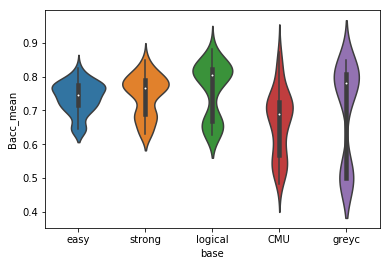

In [6]:
graph = sns.violinplot(data = df, x='base', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/bases_violin.png")

Na média, o banco de dados DSL vai pior do que os demais. 
Porém, os fluxos de dados criados por essa base são bem maiores por ele conter mais amostras por usuário do que as outras.


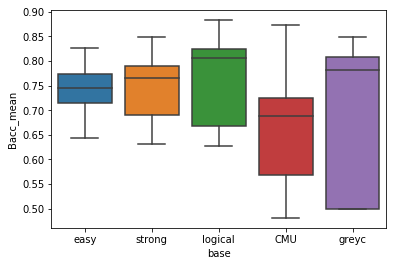

In [7]:
graph = sns.boxplot(data = df, x='base', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/bases.png")

print("""Na média, o banco de dados DSL vai pior do que os demais. 
Porém, os fluxos de dados criados por essa base são bem maiores por ele conter mais amostras por usuário do que as outras.""")

Os sistemas sem adaptação foram melhores do que os algoritmos adaptativos. 
Isso acontece porque os algoritmos adaptativos são afetados pelo modo como o fluxo de dados é construído.
Há exemplos do sliding indo melhor do que o GW porque ele tem decaimento de duas métricas


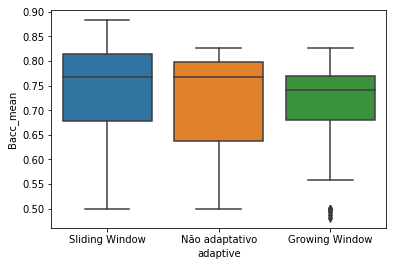

In [13]:
v = dict(linestyle='--', linewidth=2.5, color='purple')
graph = sns.boxplot(data = df, x='adaptive', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/adaptive.png")

print("""Os sistemas sem adaptação foram melhores do que os algoritmos adaptativos. 
Isso acontece porque os algoritmos adaptativos são afetados pelo modo como o fluxo de dados é construído.
Há exemplos do sliding indo melhor do que o GW porque ele tem decaimento de duas métricas""")

O desempenho do sistema diminui conforme a taxa de impostores aumenta.


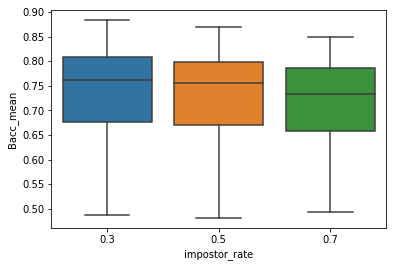

In [9]:
graph = sns.boxplot(data = df, x='impostor_rate', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/impostor_rate.png")

print("O desempenho do sistema diminui conforme a taxa de impostores aumenta.")

Os algoritmos de classificação tiveram desempenho melhor do que o OCSVM


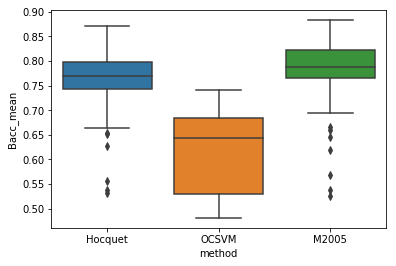

In [12]:
graph = sns.boxplot(data = df, x='method', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/method.png")

print("""Os algoritmos de classificação tiveram desempenho melhor do que o OCSVM""")

Como esperado, colocar as amostras genuínas nas primeiras posições do fluxo beneficia o sistema, ao passo que deixar as amostras impostoras nas primeiras posições prejudica.


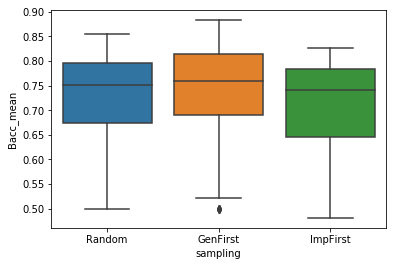

In [14]:
graph = sns.boxplot(data = df, x='sampling', y='Bacc_mean')
graph.figure.savefig("graficos/boxplots_one_variable/sampling.png")

print("""Como esperado, colocar as amostras genuínas nas primeiras posições do fluxo beneficia o sistema, \
ao passo que deixar as amostras impostoras nas primeiras posições prejudica.""")

In [12]:
f.savefig("graficos/amostragem_impostor_rate.png")

# HEAT MAPS

In [13]:
import itertools
li = ['base', 'adaptive', 'impostor_rate', 'sampling', 'method']
list(itertools.combinations(li,r=2))

[('base', 'adaptive'),
 ('base', 'impostor_rate'),
 ('base', 'sampling'),
 ('base', 'method'),
 ('adaptive', 'impostor_rate'),
 ('adaptive', 'sampling'),
 ('adaptive', 'method'),
 ('impostor_rate', 'sampling'),
 ('impostor_rate', 'method'),
 ('sampling', 'method')]

In [14]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "y", "g"], N=256) 

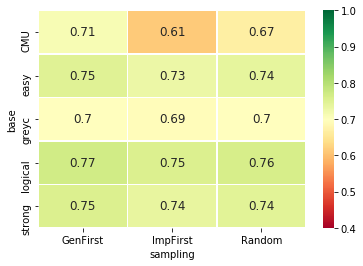

In [49]:
df_wide=df.pivot_table( index='base', columns='sampling', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/base_sampling.png")

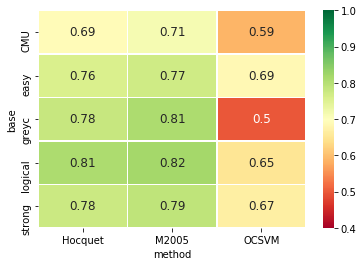

In [48]:
df_wide=df.pivot_table( index='base', columns='method', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/base_method.png")

A base DSL tem o pior desempenho das bases. Mas isso esta influenciado pela maneira BURRA que eu construi o fluxo


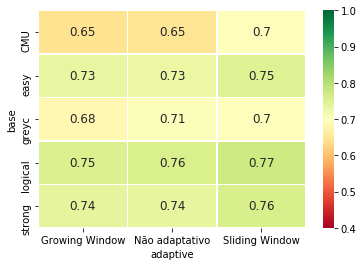

In [22]:
df_wide=df.pivot_table( index='base', columns='adaptive', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/base_adaptive.png")

print("""A base DSL tem o pior desempenho das bases. Mas isso esta influenciado pela maneira BURRA que eu construi o fluxo""")

Prova de que Sliding vai ligeiramente melhor do que growing

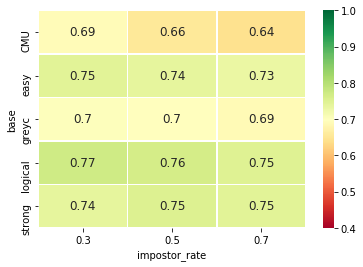

In [23]:
df_wide=df.pivot_table( index='base', columns='impostor_rate', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/base_impostor_rate.png")

### Base x taxa de impostores x método de adaptação

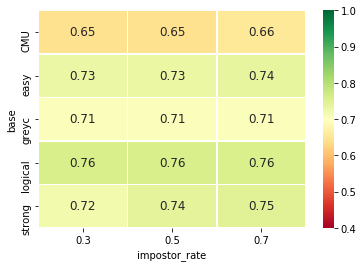

In [29]:
df1 = df[df['adaptive']=='Não adaptativo']
df2 = df[df['adaptive']=='Growing Window']
df3 = df[df['adaptive']=='Sliding Window']

df_wide=df1.pivot_table( index='base', columns='impostor_rate', values='Bacc_mean' )
hm1 = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm1.figure.savefig("graficos/heatmap_two_by_two_variables/base_impostor_rate_nAdaptativo.png")

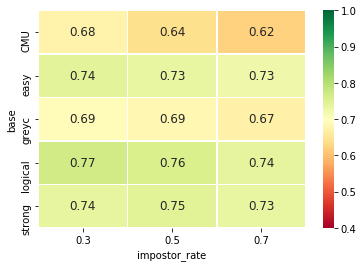

In [31]:
df_wide=df2.pivot_table( index='base', columns='impostor_rate', values='Bacc_mean' )
hm2=sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm2.figure.savefig("graficos/heatmap_two_by_two_variables/base_impostor_rate_growing.png")


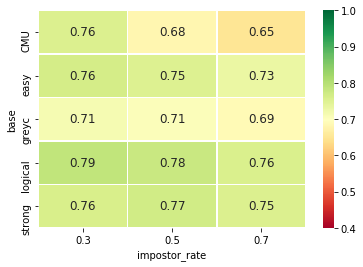

In [32]:
df_wide=df3.pivot_table( index='base', columns='impostor_rate', values='Bacc_mean' )
hm3=sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm3.figure.savefig("graficos/heatmap_two_by_two_variables/base_impostor_rate_sliding.png")

### Base x Ordenacao das amostras no fluxo x método de adaptação

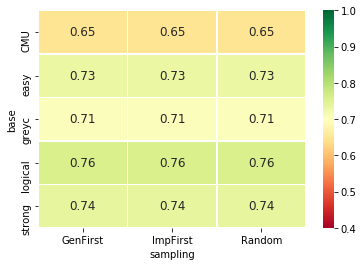

In [35]:
df1 = df[df['adaptive']=='Não adaptativo']
df2 = df[df['adaptive']=='Growing Window']
df3 = df[df['adaptive']=='Sliding Window']

df_wide=df1.pivot_table( index='base', columns='sampling', values='Bacc_mean' )
hm1=sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm1.figure.savefig("graficos/heatmap_two_by_two_variables/base_sampling_nAdaptativo.png")

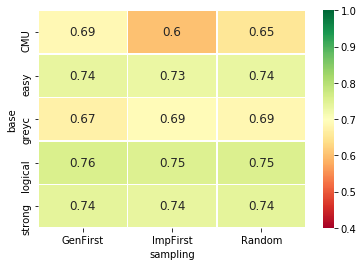

In [36]:
df_wide=df2.pivot_table( index='base', columns='sampling', values='Bacc_mean' )
hm2=sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm2.figure.savefig("graficos/heatmap_two_by_two_variables/base_sampling_growing.png")


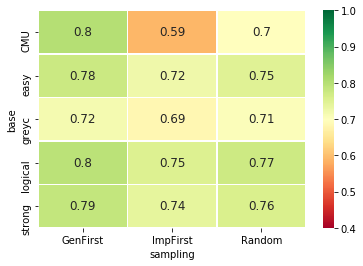

In [37]:
df_wide=df3.pivot_table( index='base', columns='sampling', values='Bacc_mean' )
hm3=sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm3.figure.savefig("graficos/heatmap_two_by_two_variables/base_sampling_sliding.png")

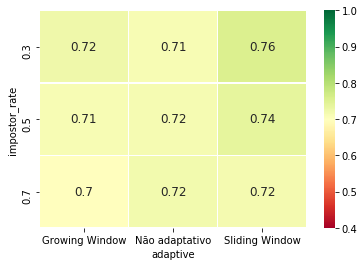

In [39]:
df_wide=df.pivot_table( index='impostor_rate', columns='adaptive', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/adaptive_impostor_rate.png")

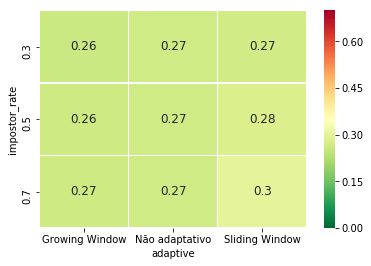

In [41]:
df_wide=df.pivot_table( index='impostor_rate', columns='adaptive', values='FNMR_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn_r", vmin=0, vmax=0.7, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/FNMR_impRate_adaptive.png")

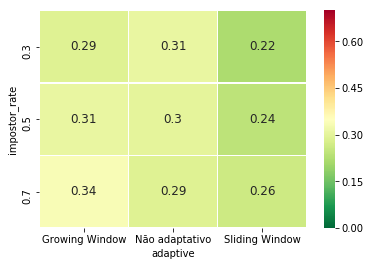

In [42]:
df_wide=df.pivot_table( index='impostor_rate', columns='adaptive', values='FMR_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn_r", vmin=0, vmax=0.7, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/FMR_impRate_adaptive.png")

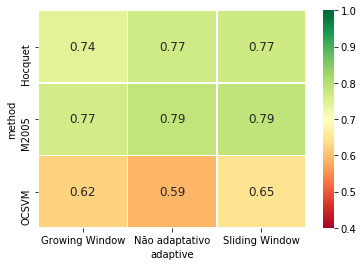

In [43]:
df_wide=df.pivot_table( index='method', columns='adaptive', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/adaptive_method.png")

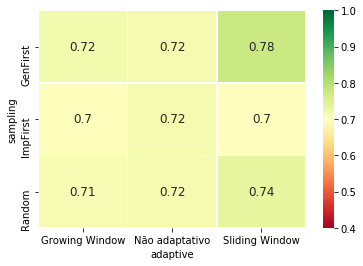

In [44]:
df_wide=df.pivot_table( index='sampling', columns='adaptive', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/adaptive_sampling.png")

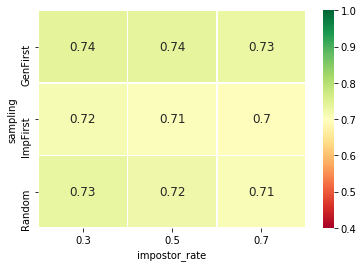

In [45]:
df_wide=df.pivot_table( index='sampling', columns='impostor_rate', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/sampling_impostor_rate.png")

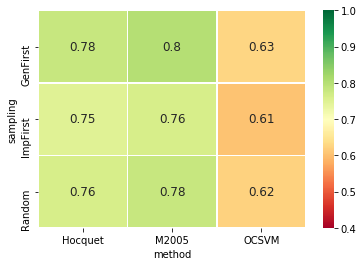

In [46]:
df_wide=df.pivot_table( index='sampling', columns='method', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/sampling_method.png")

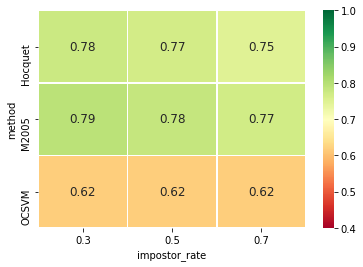

In [47]:
df_wide=df.pivot_table( index='method', columns='impostor_rate', values='Bacc_mean' )
hm = sns.heatmap(df_wide, annot=True, linecolor='white', linewidths=0.5, cmap="RdYlGn", vmin=0.4, vmax=1, annot_kws={"size": 12})
hm.figure.savefig("graficos/heatmap_two_by_two_variables/method_impostor_rate.png")

# Graficos 3D

# Baycomp

In [32]:
import baycomp

In [33]:
df = pd.read_csv("resultados/Hocket_results.csv")
df.loc[df['method']=='Statistic', 'method'] = 'Hocket'
df.shape
df

(135, 14)

,adaptive,base,impostor_rate,method,model_size,normalize,rate_external_impostor,sampling,Bacc_mean,Bacc_std,FMR_mean,FMR_std,FNMR_mean,FNMR_std
0,False,greyc,0.3,Hocket,40,False,0.5,Random,0.831447,0.139914,0.290586,0.298227,0.046520,0.069179
1,False,greyc,0.3,Hocket,40,False,0.5,GenFirst,0.831447,0.139914,0.290586,0.298227,0.046520,0.069179
2,False,greyc,0.3,Hocket,40,False,0.5,ImpFirst,0.831447,0.139914,0.290586,0.298227,0.046520,0.069179
3,False,greyc,0.5,Hocket,40,False,0.5,Random,0.826180,0.132162,0.301120,0.285472,0.046520,0.069179
4,False,greyc,0.5,Hocket,40,False,0.5,GenFirst,0.826180,0.132162,0.301120,0.285472,0.046520,0.069179
5,False,greyc,0.5,Hocket,40,False,0.5,ImpFirst,0.826180,0.132162,0.301120,0.285472,0.046520,0.069179
6,False,greyc,0.7,Hocket,40,False,0.5,Random,0.823035,0.127699,0.307410,0.277908,0.046520,0.069179
7,False,greyc,0.7,Hocket,40,False,0.5,GenFirst,0.823035,0.127699,0.307410,0.277908,0.046520,0.069179
8,False,greyc,0.7,Hocket,40,False,0.5,ImpFirst,0.823035,0.127699,0.307410,0.277908,0.046520,0.069179
9,GrowingWindow,greyc,0.3,Hocket,40,False,0.5,Random,0.806095,0.155822,0.348203,0.334794,0.039608,0.057700


In [34]:
alg_false = df.loc[(df['adaptive']=='False'), 'Bacc_mean'].ravel()
alg_growing = df.loc[(df['adaptive']=='GrowingWindow'), 'Bacc_mean'].ravel()
alg_sliding = df.loc[(df['adaptive']=='SlidingWindow'), 'Bacc_mean'].ravel()

a1 = df.loc[0, 'Bacc_mean']
a2 = df.loc[1, 'Bacc_mean']

In [35]:
list(map(len, [alg_false, alg_growing, alg_sliding]))

[45, 45, 45]

((0.0, 1.0, 0.0), <matplotlib.figure.Figure at 0x2c819219f28>)

(0.99996, 0.0, 4e-05)

(1.0, 0.0, 0.0)

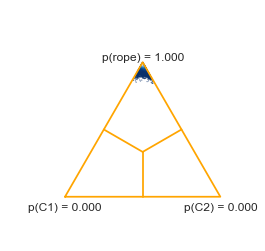

In [36]:
baycomp.two_on_multiple(alg_sliding, alg_growing, rope=0.1, plot=True)
baycomp.two_on_multiple(alg_false, alg_sliding, rope=0)
baycomp.two_on_multiple(alg_false, alg_growing, rope=0)

((0.9973003859078478, 0.002699614092152247),
 <matplotlib.figure.Figure at 0x2c81878cbe0>)

(0.9999999999957262, 4.27380353329454e-12)

(1.5541930613406415e-33, 1.0, 0.0)

(3.810313918153046e-27, 1.0, 0.0)

(6.735218465030884e-48, 1.0, 0.0)

(1.5236498009593223e-46, 1.0, 0.0)

(5.434084217885452e-41, 1.0, 0.0)

(3.0126256801396677e-62, 1.0, 0.0)

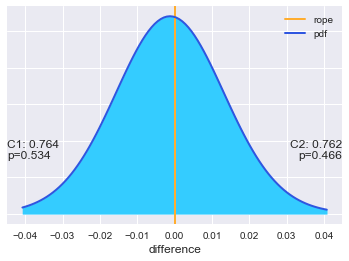

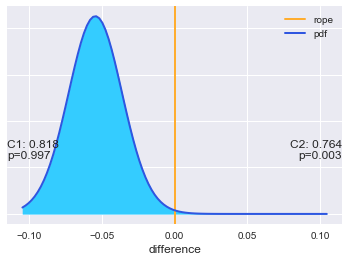

In [37]:
#(p_left, p_rope, p_right) 
a, fig = baycomp.two_on_single(alg_sliding, alg_growing, rope=0, plot=True)
baycomp.two_on_single(alg_false, alg_sliding, rope=0, plot=True)
baycomp.two_on_single(alg_false, alg_growing, rope=0)

baycomp.two_on_single(alg_sliding, alg_growing, rope=0.5)
baycomp.two_on_single(alg_false, alg_sliding, rope=0.5)
baycomp.two_on_single(alg_false, alg_growing, rope=0.5)

baycomp.two_on_single(alg_sliding, alg_growing, rope=1)
baycomp.two_on_single(alg_false, alg_sliding, rope=1)
baycomp.two_on_single(alg_false, alg_growing, rope=1)

In [38]:
a

(0.5338299009636193, 0.46617009903638074)